In [79]:
from locallib import eyeutil
from matplotlib import pyplot as plt
import random


In [80]:
def count_ratio(message, ratio, mod=-1):
    count = 0
    for i in range(len(message) - 1):
        a = message[i]
        b = message[i + 1]
        if mod != -1:
            if (a == ((b * ratio) % mod) or b == ((a * ratio) % mod)):
                count += 1
        else:
            if a == b * ratio or b == a * ratio:
                count += 1
    return count


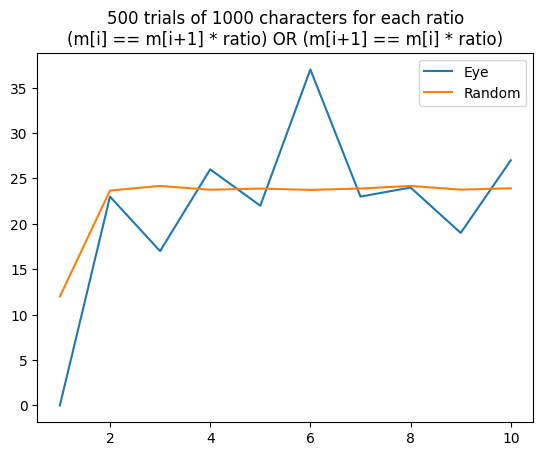

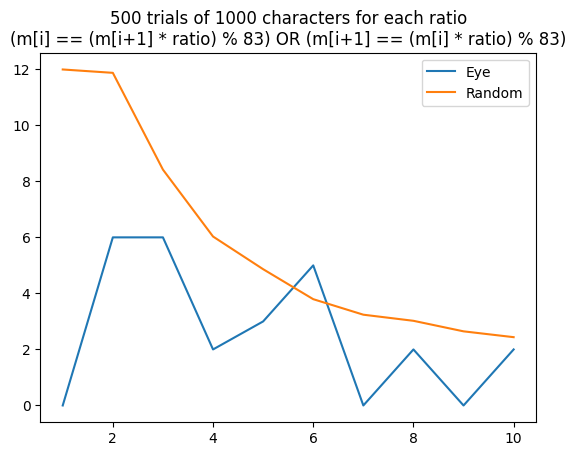

In [ ]:
ratios = range(1, 11)
trials = 500

eye_counts = []
eye_counts_mod = []
rand_counts = []
rand_counts_mod = []

msgs_eye_tri_flat = [x for lst in eyeutil.msgs_eye_tri for x in lst]

for ratio in ratios:
    eye_counts.append(count_ratio(msgs_eye_tri_flat, ratio))
    eye_counts_mod.append(count_ratio(msgs_eye_tri_flat, ratio, 83))

    counts = []
    counts_mod = []
    for i in range(trials):
        message = [ random.randint(0, 82) for _ in range(1000) ]
        counts.append(count_ratio(message, ratio))
        counts_mod.append(count_ratio(message, ratio, 83))
    rand_counts.append(sum(counts) / len(counts))
    rand_counts_mod.append(sum(counts_mod) / len(counts_mod))

plt.title("500 trials of 1000 characters for each ratio\n(m[i] == m[i+1] * ratio) OR (m[i+1] == m[i] * ratio)")
plt.plot(ratios, eye_counts_mod, label="Eye")
plt.plot(ratios, rand_counts_mod, label="Random")
plt.legend()
plt.show()

plt.title("500 trials of 1000 characters for each ratio\n(m[i] == (m[i+1] * ratio) % 83) OR (m[i+1] == (m[i] * ratio) % 83)")
plt.plot(ratios, eye_counts, label="Eye")
plt.plot(ratios, rand_counts, label="Random")
plt.legend()
plt.show()
